<a href="https://colab.research.google.com/github/yoonputer/test_deeplearning/blob/master/boston_housingwithregression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow.keras.datasets.boston_housing import load_data

# Dataset

In [46]:
(x_train, y_train), (x_test, y_test) = load_data(path='boston_housing.npz', test_split=0.2, seed=113)
x_train.shape, y_train.shape, x_test.shape, y_test.shape, type(x_train)

((404, 13), (404,), (102, 13), (102,), numpy.ndarray)

In [47]:
import pandas as pd

In [48]:
df = pd.DataFrame(x_train)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404 entries, 0 to 403
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       404 non-null    float64
 1   1       404 non-null    float64
 2   2       404 non-null    float64
 3   3       404 non-null    float64
 4   4       404 non-null    float64
 5   5       404 non-null    float64
 6   6       404 non-null    float64
 7   7       404 non-null    float64
 8   8       404 non-null    float64
 9   9       404 non-null    float64
 10  10      404 non-null    float64
 11  11      404 non-null    float64
 12  12      404 non-null    float64
dtypes: float64(13)
memory usage: 41.2 KB


In [49]:
df.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12
count,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.745111,11.480198,11.104431,0.061881,0.557356,6.267082,69.010644,3.740271,9.440594,405.898515,18.475990,354.783168,12.740817
std,9.240734,23.767711,6.811308,0.241238,0.117293,0.709788,27.940665,2.030215,8.698360,166.374543,2.200382,94.111148,7.254545
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,188.000000,12.600000,0.320000,1.730000
25%,0.081437,0.000000,5.130000,0.000000,0.453000,5.874750,45.475000,2.077100,4.000000,279.000000,17.225000,374.672500,6.890000
50%,0.268880,0.000000,9.690000,0.000000,0.538000,6.198500,78.500000,3.142300,5.000000,330.000000,19.100000,391.250000,11.395000
75%,3.674808,12.500000,18.100000,0.000000,0.631000,6.609000,94.100000,5.118000,24.000000,666.000000,20.200000,396.157500,17.092500
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.725000,100.000000,10.710300,24.000000,711.000000,22.000000,396.900000,37.970000


In [50]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [51]:
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)
x_train.shape, x_test.shape

((404, 13), (102, 13))

In [52]:
df = pd.DataFrame(x_train)
df.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12
count,4.040000e+02,4.040000e+02,4.040000e+02,4.040000e+02,4.040000e+02,4.040000e+02,4.040000e+02,4.040000e+02,4.040000e+02,4.040000e+02,4.040000e+02,4.040000e+02,4.040000e+02
mean,-1.015414e-16,1.099231e-17,1.743380e-15,-1.266863e-16,-5.253773e-15,6.414149e-15,2.984411e-16,4.946538e-16,1.126711e-17,-1.981363e-16,2.366864e-14,5.956800e-15,6.139204e-16
std,1.001240e+00,1.001240e+00,1.001240e+00,1.001240e+00,1.001240e+00,1.001240e+00,1.001240e+00,1.001240e+00,1.001240e+00,1.001240e+00,1.001240e+00,1.001240e+00,1.001240e+00
min,-4.051005e-01,-4.836155e-01,-1.564696e+00,-2.568327e-01,-1.471269e+00,-3.817250e+00,-2.369042e+00,-1.287503e+00,-9.715693e-01,-1.311311e+00,-2.673752e+00,-3.771101e+00,-1.519664e+00
25%,-3.969615e-01,-4.836155e-01,-8.782218e-01,-2.568327e-01,-8.908055e-01,-5.534305e-01,-8.433882e-01,-8.202251e-01,-6.262491e-01,-7.636737e-01,-5.692381e-01,2.116008e-01,-8.075036e-01
50%,-3.766520e-01,-4.836155e-01,-2.079167e-01,-2.568327e-01,-1.652266e-01,-9.674263e-02,3.400464e-01,-2.949009e-01,-5.111423e-01,-4.567563e-01,2.839433e-01,3.879673e-01,-1.857436e-01
75%,-7.617386e-03,4.296024e-02,1.028326e+00,-2.568327e-01,6.286420e-01,4.823165e-01,8.990647e-01,6.794540e-01,1.675886e+00,1.565287e+00,7.844764e-01,4.401777e-01,6.005999e-01
max,9.234847e+00,3.728990e+00,2.445374e+00,3.893584e+00,2.677335e+00,3.467186e+00,1.110488e+00,3.437406e+00,1.675886e+00,1.836097e+00,1.603531e+00,4.480771e-01,3.482019e+00


# Model and fit

In [53]:
model = tf.keras.models.Sequential()

In [54]:
model.add(tf.keras.Input(shape=(13))) # input layer

model.add(tf.keras.layers.Dense(64, activation='sigmoid')) # 기능 layer  # 정식명칭은 hidden layer
model.add(tf.keras.layers.Dense(64, activation='sigmoid')) # 기능 layer
model.add(tf.keras.layers.Dense(64, activation='sigmoid')) # 기능 layer

model.add(tf.keras.layers.Dense(1,)) # output layer

model.compile(optimizer='sgd',loss='mse', metrics=['mae'])

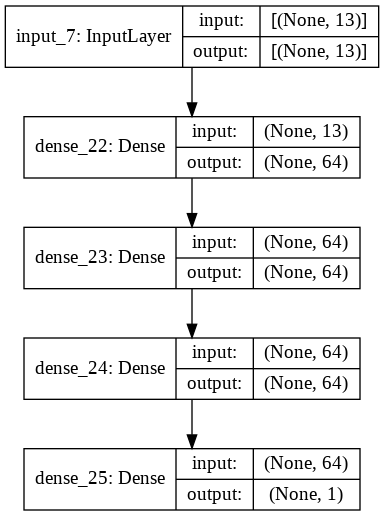

In [55]:
tf.keras.utils.plot_model(model, show_shapes=True)

In [56]:
model.summary()  # 눈에 익혀놓는게 좋음

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_22 (Dense)             (None, 64)                896       
_________________________________________________________________
dense_23 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_24 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_25 (Dense)             (None, 1)                 65        
Total params: 9,281
Trainable params: 9,281
Non-trainable params: 0
_________________________________________________________________


In [57]:
model.fit(x_train, y_train, epochs=100)

Epoch 1/100
13/13 [==============================] - 1s 3ms/step - loss: 137.9870 - mae: 8.4829
Epoch 2/100
13/13 [==============================] - 0s 4ms/step - loss: 83.9568 - mae: 6.5743
Epoch 3/100
13/13 [==============================] - 0s 3ms/step - loss: 79.1208 - mae: 6.3874
Epoch 4/100
13/13 [==============================] - 0s 2ms/step - loss: 76.4017 - mae: 6.2081
Epoch 5/100
13/13 [==============================] - 0s 2ms/step - loss: 64.0665 - mae: 5.5891
Epoch 6/100
13/13 [==============================] - 0s 2ms/step - loss: 49.8989 - mae: 4.8470
Epoch 7/100
13/13 [==============================] - 0s 2ms/step - loss: 39.5088 - mae: 4.2014
Epoch 8/100
13/13 [==============================] - 0s 2ms/step - loss: 33.5292 - mae: 3.8051
Epoch 9/100
13/13 [==============================] - 0s 2ms/step - loss: 29.3486 - mae: 3.7055
Epoch 10/100
13/13 [==============================] - 0s 2ms/step - loss: 24.7938 - mae: 3.3985
Epoch 11/100
13/13 [============================

# evaluation

In [58]:
model.evaluate(x_train, y_train)

13/13 [==============================] - 0s 1ms/step - loss: 8.6327 - mae: 2.2181


[8.632672309875488, 2.2181365489959717]

# Service

In [68]:
x_train[10]

array([ 0.63391647, -0.48361547,  1.0283258 , -0.25683275,  1.15788777,
        0.19313958,  1.11048828, -1.03628262,  1.67588577,  1.5652875 ,
        0.78447637,  0.22689422,  1.04466491])

In [69]:
model.predict([[ 0.63391647, -0.48361547,  1.0283258 , -0.25683275,  1.15788777,
        0.19313958,  1.11048828, -1.03628262,  1.67588577,  1.5652875 ,
        0.78447637,  0.22689422,  1.04466491]])

array([[14.070499]], dtype=float32)

In [70]:
y_train[10]

12.1